<a href="https://colab.research.google.com/github/Disogu/Proyecto-2-CODERS-G9/blob/main/proyecto2(opiniones_de_pel%C3%ADculas)_examen_g9_(Diego_Son%C3%AD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

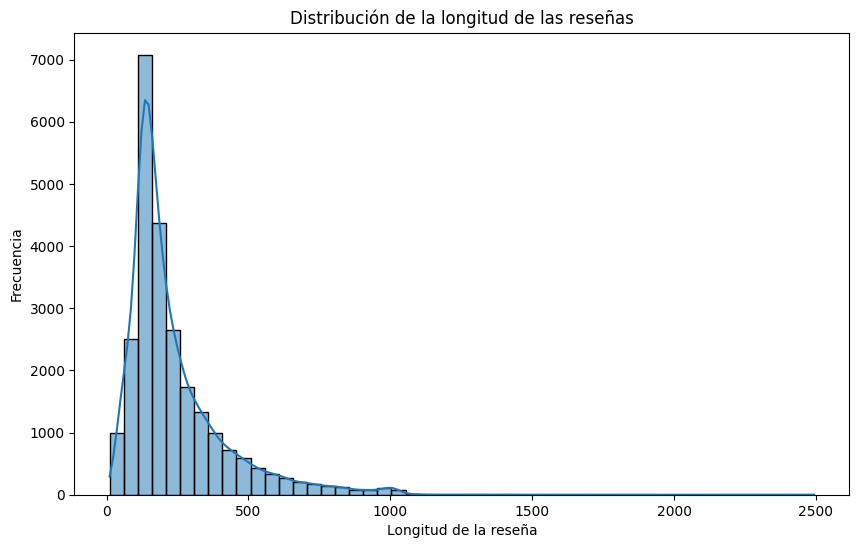

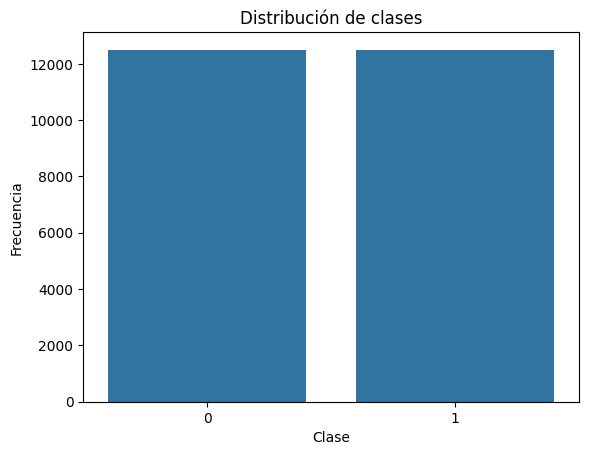

In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Tamaño de las reseñas
review_lengths = [len(review) for review in X_train]

# Histograma de longitudes de reseñas
plt.figure(figsize=(10,6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title("Distribución de la longitud de las reseñas")
plt.xlabel("Longitud de la reseña")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de clases
sns.countplot(x=y_train)
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()



In [7]:
import os
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar el dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Padding de las secuencias
maxlen = 500
X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

# Crear carpeta si no existe
os.makedirs('data', exist_ok=True)

# Guardar los datos preprocesados
np.save('data/X_train.npy', X_train_padded)
np.save('data/X_test.npy', X_test_padded)
np.save('data/y_train.npy', y_train)
np.save('data/y_test.npy', y_test)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
!pip install mlflow -q
import mlflow
import mlflow.keras

# Cargar los datos preprocesados
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

# Definir el modelo
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento con EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

with mlflow.start_run():
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop])

    # Guardar el modelo
    model.save('models/lstm_model.h5')
    mlflow.keras.log_model(model, "lstm_model")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 214s 674ms/step - accuracy: 0.7024 - loss: 0.5521 - val_accuracy: 0.7702 - val_loss: 0.4756
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 213s 682ms/step - accuracy: 0.8706 - loss: 0.3185 - val_accuracy: 0.8584 - val_loss: 0.3391
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 692ms/step - accuracy: 0.9182 - loss: 0.2140 - val_accuracy: 0.8632 - val_loss: 0.3243
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 262s 691ms/step - accuracy: 0.9467 - loss: 0.1483 - val_accuracy: 0.8730 - val_loss: 0.3358
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 255s 668ms/step - accuracy: 0.9601 - loss: 0.1136 - val_accuracy: 0.8658 - val_loss: 0.3763


2025/05/15 23:36:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/15 23:36:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Cargar el modelo y los datos
model = load_model('models/lstm_model.h5')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step
Accuracy: 0.86272
F1 Score: 0.8620800514386755
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

